<a href="https://colab.research.google.com/github/Someya-Gaku/Python_study/blob/main/Python4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ライブラリのインポート
import numpy as np                        # numpy             → 処理速度が速く様々な演算が可能になる　// 処理速度比較の実験は P41の Column欄にて
import numpy.random as random             # numpy.random      → numpyの提供している乱数生成機能
import scipy as sp                        # scipy             → numpyの機能強化版（統計や信号計算、線形代数の計算やフーリエ変換などが出来る）
import pandas as pd                       # pandas            → データ加工が出来るようになる
from pandas import Series, DataFrame      # Series, DataFrame → Seriesが1次元、DataFrameが2次元（pandasからSeriesとDataFrameをインポートしている）

# 可視化ライブラリ
import matplotlib.pyplot as plt           # matplotlib.pyplot → 描画に関する機能の大半が pyplot を用いるため、あらかじめ plt という名前で簡易的に使えるようにしている
import matplotlib as mpl                  # データのグラフ化(可視化)が出来るようになる
import seaborn as sns                     # きれいなグラフを描画できるようになる

# グラフ表示のためのマジックコマンド（ matplotlib による拡張）
%matplotlib inline
# 小数第3位まで表示
# 小数第何桁まで表示させるか指定するためのマジックコマンド ( numpy による拡張)
%precision 3


#マジックコマンドはIPythonであり、Python のコードではありません。
#そのため、マジックコマンドの横にコメントをつけることはできない

'%.3f'

In [5]:
# 確率 // P97
dice_data = np.array([1, 2, 3, 4, 5, 6])                    # サイコロ(1-6の数字リスト)を作成

print("サイコロを振る :", np.random.choice(dice_data, 1))   # .choice() // P40

サイコロを振る : [3]


---

1つずつの試行結果を **根元事象(基本事象)** と言い、全ての根元事象を集めた集合を **標本空間** と言う。


そして、標本空間における任意の集合を **事象(E : Event)** と言う。

(サイコロから5が出る事象Xや、偶数目が出る事象Y… etc)

$X$ = {5} ,
$Y$ = {2, 4, 6}

---

また、空集合$∅$ (要素を全く持たない集合) も事象であり、**空事象** と言い、

(サイコロで 7 が出る…etc)


ある事象Eに属さない結果の集合を **余事象** と言う。これはEの **補集合(C : Complement)** とも言う

($E$ = {2, 4, 6}  の時の余事象は、$E^c$ = {1, 3, 5})

---

$A$ = {1, 2, 3} ,  $B$ = {1, 3, 4, 5}

において、

$A ⋂ B$ **(積事象)** = {1, 3}

$A ⋃ B$ **(和事象)** = {1, 2, 3, 4, 5}


---

> **確率P の 計算**

1.   $P(X) = 1/6$

2.   $P(∅) = 0$

3.   $P(A ⋂ B) = 1/3$

4.   $P(A ⋃ B) = 5/6$

確率Pは、その事象が起こる場合の数 / 起こりうる全ての場合の数











In [ ]:
# 統計的確率 // P99

# 1000回サイコロを振る
dice_rolls = np.random.choice (dice_data, 1000)

# 各数字の出た割合
for i in range (1, 7):
  p = len(dice_rolls[dice_rolls == i]) / 1000       # len() → 要素の数を求める (dice_rolls が i の時の回数 )
                                                    # 確率p は、それぞれの出た目の回数 / 全体の数(1000) で求まる。
  print (i, "が出る確率 :", p)


1 が出る確率 : 0.16
2 が出る確率 : 0.157
3 が出る確率 : 0.18
4 が出る確率 : 0.164
5 が出る確率 : 0.177
6 が出る確率 : 0.162




---


**条件付確率と乗法定理 // P100**


事象Aが起きた条件で、事象Bが起きる確率 (Aが与えられた下でのBの条件付確率)

$ P(B|A) = P(A⋂B) / P(A) $

さらに式変形すると(**乗法定理**)

$P(A⋂B) = P(B|A) P(A)$

(EX: サイコロを1回振って、偶数が出た。これが4以上である確率は？ → 偶数である事象A と 4以上が出る事象B)

 $A$ = {2, 4, 6},  $B$ = {4, 5, 6} このとき、$A⋂B$ = {4, 6}

 したがって、$P(B|A) =  P(A⋂B) / P(A)$ より、
 $$
 \frac{\frac{3}{6}}{\frac{2}{6}} = \frac{2}{3}
 $$


---




**独立と従属 // P101**

事象Aと事象Bが互いに **独立** している場合、以下の式が "成立する" のに対して、

事象Aと事象Bが互いに **従属** している場合、以下の式は "成立しない"

$$P(A⋂B) = P(A) P(B)$$

偶数である事象$A$ = {2, 4, 6}, 4以上である事象$B$ = {4, 5, 6} を例で考えると、

$$P(A⋂B) = \frac{2}{6} = \frac{1}{3}$$

$$P(A)P(B) = \frac{3}{6}・\frac{3}{6} = \frac{1}{4}$$

となり、等しくないため、この事象AとBは**従属関係**であると分かる


---






**ベイズの定理 // P101**

Aという結果が分かっているときに、その原因がBである確率

なお、$B^c$は$B$の補集合のことで、$B$ではない集合である。

$$
P(B|A) = \frac{P(A|B)P(B)}{P(A|B)P(B) + P(A|B^c)P(B^c)}
$$


---


$P(B)$は**事前確率** (事象Aが起きる前の事象Bの確立)

$P(B|A)$は**事後確率** (事象Aが起きた場合の事象Bの確立)

$P(A|B)$は**尤度(ゆうど)** (Bが起きた場合にAが起こるであろう確率)

---






In [ ]:
# 練習問題 4-1
# コインの表を0、裏を1として表現する配列を以下のように用意し、コイン投げを1000回試行した結果、表(0)と裏(1)がでる確立をそれぞれ求めなさい。
# coin_data = np.array([0, 1])

coin_data = np.array([0, 1])
practice4_1 = np.random.choice(coin_data, 1000)

for i in coin_data:
  ans = len(practice4_1[practice4_1 == i]) / 1000
  print (i, "が出る確率 : ", ans)


0 が出る確率 :  0.52
1 が出る確率 :  0.48


In [ ]:
# 練習問題 4-2 (計算問題)
# 1000本中当たりが100本あるくじを、AさんとBさんが順に1回ずつ引き、それが共に当たりである確率 (引いたくじは戻さない)

# Aさんは、1000本中100本の内、当たり1本を引いたので、1000 / 100
# Bさんは、999 本中 99本の内、当たりを1本引いたので、 999 / 99
# 従って求める確率は、1000 / 100 ×　999 / 99 である。

print ("答え :", (100/1000)*(99/999))

答え : 0.009909909909909911


In [1]:
# 練習問題 4-3 (計算問題)
# 日本国内である病気(X)になっている人の割合は、0.1%で、Xを発見する検査方法は以下の事がわかっています
# ・ その病気の人   がその検査を受けると　99%の人が陽性反応を示す
# ・その病気でない人がその検査を受けると、3 %の人が陽性反応を示す(誤診)
# 日本に住んでいるある人がこの検査を受けたら陽性反応を示した。この人が病気Xである確率は何%であるか

$$
P(B|A) = \frac{P(A|B)P(B)}{P(A|B)P(B) + P(A|B^c)P(B^c)}
$$

---
$P(B|A)$ : 病気Xの人が陽性反応を示す = 0.99

$P(A)$   : 病気Xの人の割合 = 0.001

$P(B|A^c)$ : 病気Xでない人が陽性反応を示す(誤診) = 0.03

$P(A^c)$ : 病気Xでない人の割合 = 1 - 0.001 = 0.999


In [2]:
# 上記に示した ベイズの定理 (P101) を用いて計算する

print ("答え :", 0.99*0.001 / (0.9 *0.001 + 0.03*0.999))

答え : 0.03206997084548105


**確率変数と確率分布 // P103**

**確率変数** とは、確率が割り当てられる変数のこと (サイコロでは 1/6)

**実現値** とは、確率変数 がとりうる値のこと (サイコロでは、[1, 2, 3, 4, 5, 6] )

**離散確率変数** とは、実現値 が数え上げられる値(連続ではない値)の時を指す

**連続確率変数** とは、実現値 が連続した値である時を指す

**分布関数(累積確率分布関数)** とは、確率変数X が実数x 以下になる確率 (離散確率変数の時)

**密度関数(確率密度関数)** とは、分布関数の導関数 (連続確率変数の時)

---


// P 104


**期待値(平均)** とは 確率変数がとる値とその値をとる確率の積を全て足し合わせたもので確率変数の平均値を表す

(一個のサイコロを一回投げる時の出る目の期待値 : １×１/6＋2×１/6＋3×１/6＋4×１/6＋5×１/6＋6×１/6＝7/2)

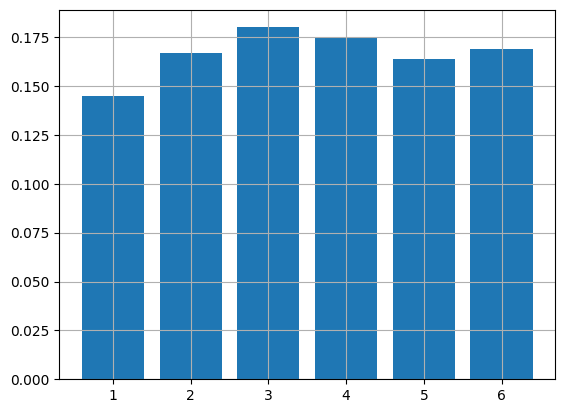

In [13]:
# さまざまな分布関数 // P104
# 一様分布 (すべての事象が起こる確率が等しいもの (サイコロなど))

# サイコロを1000回振って、それぞれの出た数字の割合を計算する

dice_data = np.array([1, 2, 3, 4, 5, 6])
dice_rolls = np.random.choice(dice_data, 1000)                                  # .choice()

prob_data = np.array([])                                                        # 空の配列作成
for i in range (1, 7):
  p = len(dice_rolls[dice_rolls == i]) / 1000                                   # 確率p は、それぞれの出た目の回数 / 全体の数(1000) で求まる。
  prob_data = np.append(prob_data, p)                                           # np.append()  →  (既出) 配列に要素を追加する // P16 Let's Try (Python-1.ipynb 参照)

plt.bar (dice_data, prob_data)                                                  # plt.bar()    → 棒グラフを表示
plt.grid(True)

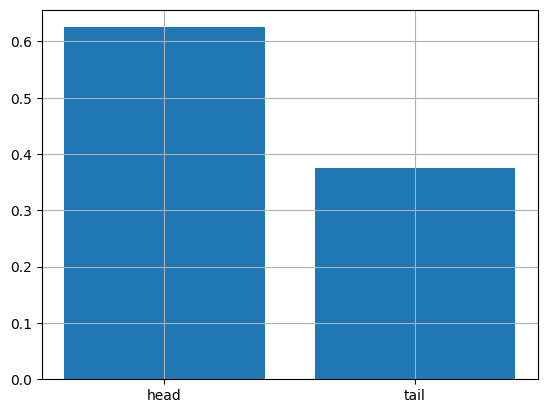

In [18]:
# ベルヌーイ分布 // P105
# 結果が2種類(表と裏…など)しかない試行のこと

# コインを8回投げて、表(0)・裏(1)としたときに、[0, 0, 0, 0, 0, 1, 1, 1]であったときの分布

prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# unique で一意な値を抽出 (ここでは0と1)
for i in np.unique(coin_data):                       # np.unique     → NumPy配列から重複を削除してユニークな要素だけの配列（集合）を作る機能
  p = len(coin_data[coin_data == i]) / len(coin_data)
  prob_be_data = np.append(prob_be_data, p)

# グラフ化
plt.bar([0, 1], prob_be_data, align = "center")      # align = ○○  → どこを基準に揃えるかを指定できる(今回は 中央揃え)
plt.xticks([0, 1], ["head", "tail"])                 # plt.xticks    → メモリの設定 (目盛りの座標値を第一引数、置き換え文字列を第二引数にとる)
plt.grid(True)

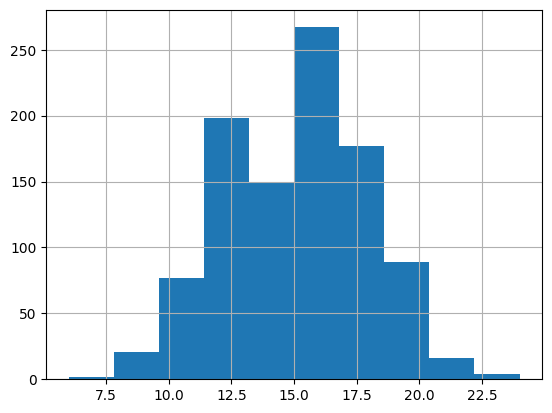

In [19]:
# Pythonで分布に基づくデータを取得する
# 実データからグラフを作るのではなく、特定の分布に基づいたグラフを得る方法 (Numpyの各種関数の使い方)


# 二項分布 // P106
# 独立なベルヌーイ試行をn回繰り返したもの

np.random.seed(0)

x = np.random.binomial(30, 0.5, 1000)       # np.random.binomial()  → 独立なベルヌーイ試行n回の内、確率pで生じる事象が発生する回数を求める (試行回数n, 確率p, サンプル数 で引数をとる)
plt.hist(x)
plt.grid(True)

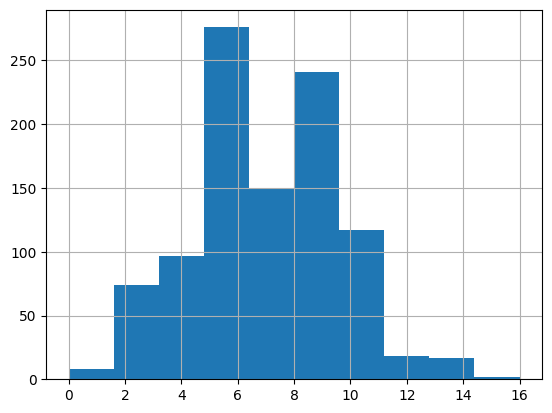

In [20]:
# ポアソン分布 // P106
# 稀な事象が起きる確率の時に用いられる ( 一定の時間や面積に対して一定の割合で発生する分布 → 単位面積当たりの雨粒の数や、一平米あたりに生えている木の数など)

x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

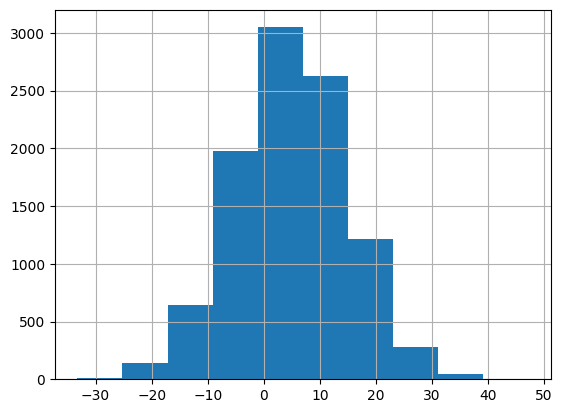

In [22]:
# 正規分布(ガウス分布)と対数正規分布
# 正規分布     : 代表的な連続型の確率分布
# 対数正規分布 : log x が正規分布に従う時の分布

x = np.random.normal(5, 10, 10000)    # np.random.normal  → (既出)正規分布に従って乱数生成 (引数に、平均, 標準偏差, サンプル数 をとる)
plt.hist(x)
plt.grid(True)

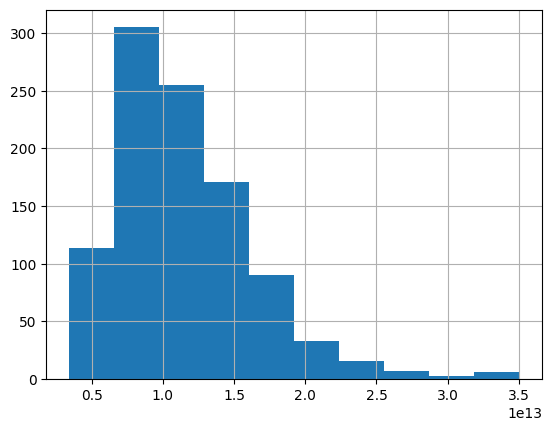

In [23]:
# 対数正規分布 // P107

x = np.random.lognormal(30, 0.4, 1000) # np.random.lognormal  →  log x が正規分布に従う時の分布
plt.hist(x)
plt.grid(True)

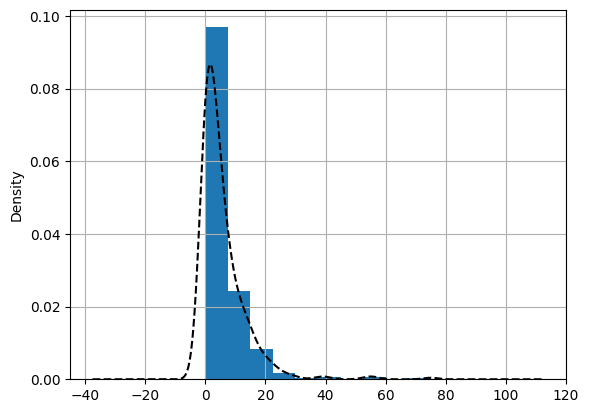

In [21]:
# カーネル密度関数 // P107

import requests
import zipfile
from io import StringIO
import io

zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データの読み込み
student_data_math = pd.read_csv("student-mat.csv", sep=";")

#DataFrame内の "absences" 列のデータを使用して、カーネル密度推定（KDE）のプロットを行っている。"k--" はラインのスタイルを指定している。
student_data_math.absences.plot(kind="kde", style="k--")

#単純なヒストグラム、density=Trueにすることで、確率を表示
student_data_math.absences.hist(density=True)
plt.grid(True)

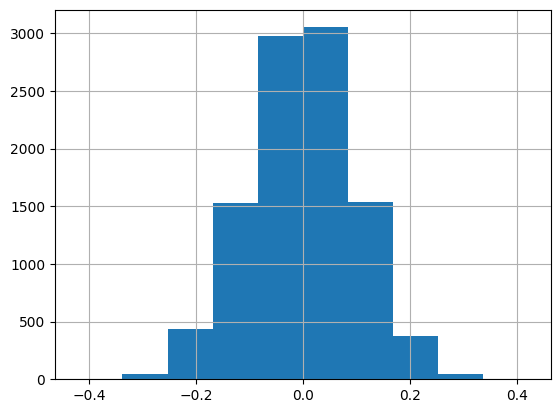

In [31]:
# 練習問題 4-4
# 平均0,分散1の正規分布から n=100 の標本抽出を10000回繰り返して、標本分布(ヒストグラム)を描画しなさい。

practice4_4 = [np.random.normal (0, 1, 100).mean() for _ in range(10000)]
plt.hist(practice4_4)
plt.grid(True)

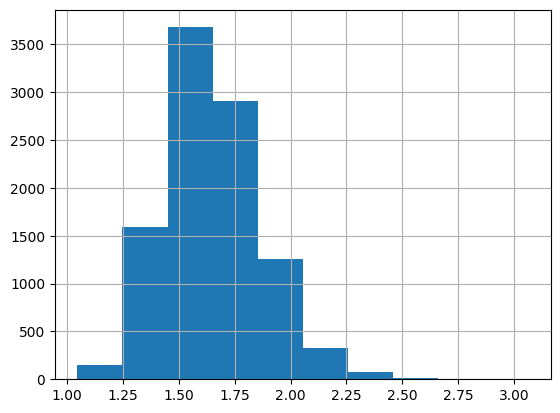

In [32]:
# 練習問題 4-5
# 上記問題と同じく、対数正規分布の場合を実装しなさい。

practice4_4 = [np.random.lognormal (0, 1, 100).mean() for _ in range(10000)]
plt.hist(practice4_4)
plt.grid(True)

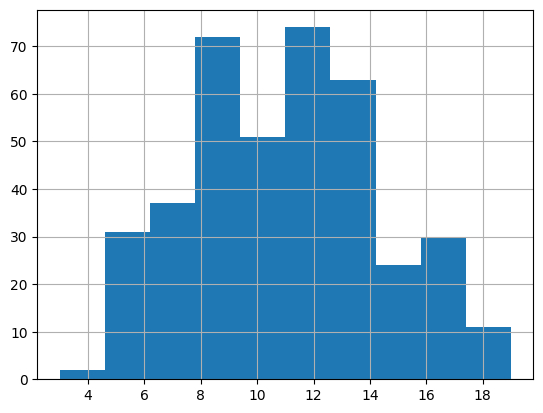

In [36]:
# 練習問題 4-6
# 3章で使った学生の数学の成績データ(student-mat.csv)の一期目の成績(G1)のヒストグラムとカーネル密度推定を描きなさい

import requests, zipfile
from io import StringIO
import io

url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url,stream = True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


# ヒストグラム
practice4_6 = pd.read_csv("student-mat.csv", sep = ";")
plt.hist(practice4_6.G1)
plt.grid(True)

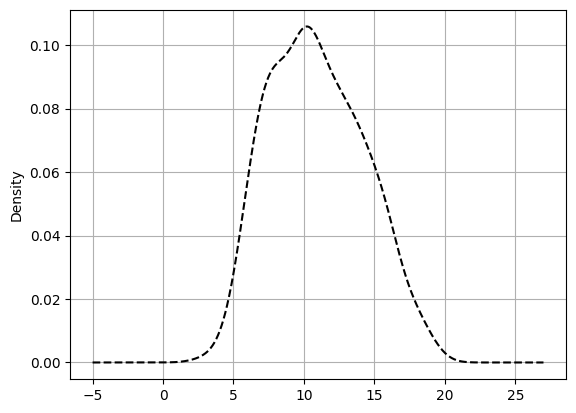

In [37]:
# カーネル密度推定
practice4_6.G1.plot(kind = "kde", style = "k--")
plt.grid(True)

## この内容は応用的なものであり、読み流す程度でも後の章に大きな影響はありません

**同時確率関数と周辺確率関数 // P 109**
> $X$が$\left\{x_1,x_2,\cdots\right\}$、$Y$が$\left\{y_1,y_2,\cdots\right\}$上で値をとる離散型の確率変数とし、$X=x_i,\:Y=y_i$である確率を以下のように書く
$$P(X=x_i,Y=y_j)=p_{X,Y}(x_i,y_j)$$
> これを同時確率関数という
>
> また
$$p_X(x_i)=\sum_{j=0}^\infty p_{X,Y}(x_i,y_j)$$
> を$X$の周辺確率関数という
>
> 例えば、次のようなデータがあったとする
>> ||S評価|A評価|B評価|C評価|D評価|
>> |-|-|-|-|-|-|
>> |男性（人）|$$4$$|$$7$$|$$6$$|$$6$$|$$1$$|
>> |女性（人）|$$5$$|$$6$$|$$6$$|$$7$$|$$0$$|
>
> このデータは性別と成績で２種類の実現値がある
>
> 文字で表すなら以下のようになる
>> ||$y_1$|$y_2$|$y_3$|$y_4$|$y_5$|
>> |-|-|-|-|-|-|
>> |$x_1$|$$4$$|$$7$$|$$6$$|$$6$$|$$1$$|
>> |$x_2$|$$5$$|$$6$$|$$6$$|$$7$$|$$0$$|
>
> 同時確率関数は、性別と成績それぞれがある値をとる確率を返すので、表で表すと以下のようになる
>> ||S評価|A評価|B評価|C評価|D評価|
>> |-|-|-|-|-|-|
>> |男性（％）|$$8.3$$|$$14.6$$|$$12.5$$|$$12.5$$|$$2.1$$|
>> |女性（％）|$$10.4$$|$$12.5$$|$$12.5$$|$$14.6$$|$$0.0$$|
>
> 周辺確率関数は、性別か成績の片方を無視して、もう片方がある値をとる確率を返すので、表で表すと以下のようになる$^{[4]}$
>> ||S評価＋A評価＋B評価＋C評価＋D評価|
>> |-|-|
>> |男性（％）|$$50.0$$|
>> |女性（％）|$$50.0$$|
>>
>> ||S評価|A評価|B評価|C評価|D評価|
>> |-|-|-|-|-|-|
>> |男性＋女性（％）|$$18.8$$|$$27.1$$|$$25.0$$|$$27.1$$|$$2.1$$|
>


**条件付確率関数と条件付き期待値 // P 109**
> １変数のときのように２変数でも条件付確率を考えることができる
>
> $X=x_i$を与えたときに$Y=y_j$である確率は
$$P_{Y|X}(y_j|x_i)=P(Y=y_j|X=x_i)=\frac{p_{X,Y}(x_i,y_j)}{p_X(x_i)}$$
>
> また、条件付確率関数に関して期待値をとったものが条件付き期待値である
$$E[Y|X=x_i]=\sum_{j=1}^\infty y_ip_{Y|X}(y_j|x_i)=\frac{\displaystyle\sum_{j=1}^\infty y_jp_{X,Y}(x_i,y_j)}{p_X(x_i)}$$

**独立の定義と連続分布 // P110 **
> すべての$x_i,\:y_j$に対して以下が成り立つとき、「独立である」とする
$$p_{X,Y}(x_i,y_j)=p_X(x_i)p_Y(y_j)$$
>
> 連続分布についても、同時確率密度関数、周辺確率密度関数、条件付確率密度関数、独立などを定義できる
>
> また、３つ以上の確率変数を扱う多変量正規分布などもある。
$$\Sigma=\begin{bmatrix}\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1n}\\\sigma_{21}&\sigma_2^2&\cdots&\sigma_{2n}\\\vdots&\vdots&\ddots&\vdots\\\sigma_{n1}&\sigma_{n2}&\cdots&\sigma_n^2\end{bmatrix}$$
>
> $$f(\vec{x})=\frac{1}{\sqrt{(2\pi)^n|\Sigma|}}e^{-\frac{1}{2}(\vec{x}-\vec{\mu})^\top\Sigma^{-1}(\vec{x}-\vec{\mu})}$$

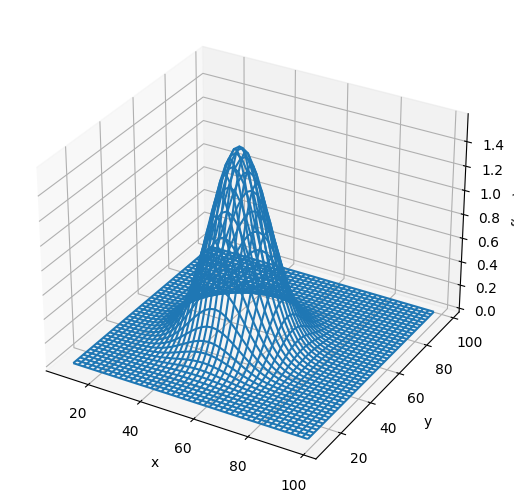

In [39]:
# 2次元の正規分布をグラフで表示する // P110

# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]                             # np.mgrid

pos = np.empty(x.shape + (2, ))                                 # np.empty

pos[:,:,0] = x                                                  # pos[]
pos[:,:,1] = y


# 上のxとyは、10から100まで2つずつ数を作成して、posとしてまとめている
# (次に発生させる多次元の正規分布を可視化するために、xとyを細かく刻んでいるだけで、区切り数字等に意味はない)

# 多次元正規分布 (それぞれの変数の平均と分散共分散行列の設定)
# 以下の例では、50と50の平均をとるxとyについて、それぞれ[100,0]と[0,100]の共分散行列を設定
rv = multivariate_normal([50,50],[[100,0],[0,100]])

# 確率密度関数
z = rv.pdf(pos)                                                 # .pdf()

fig = plt.figure(dpi=100)                                       # plt.figure()

ax = Axes3D(fig)
fig.add_axes(ax)                                                # .add_axes()
                                                                # 今のバージョンではこれを追加しないと表示されない
# ラベル設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# z軸の表示メモリ単位を変更、sciが指数表記、axisで軸を指定、scilimits = (n,m)はnからmの外にあるものは指数表記(0,0ですべてという意味)
ax.ticklabel_format(style="sci", axis="z", scilimits=(0, 0))    # .ticklabel_format()

ax.plot_wireframe(x, y, z)

fig.show()

**推計統計学 // P112**

> 標本：手に入れたデータのこと
>
> 母集団：標本をベースに統計的な分析をして推測しようとする対称全体
>
> 抽出：母集団から標本を取り出すこと
>
> 母数：母平均や母分散など母集団の特性を表す定数

**大数の法則 // P112**
> サイコロを振ってそれまでの出目の平均値を計算し、もう一度振ってまた出目の平均値を計算するという処理を繰り返す
>
> そうすると、平均値は期待値の$3.5$に近づく
>
> このような現象を大数の法則という
>
> 厳密に表すと
>>
>> 確率変数$X_1,X_2,\cdots ,X_n$が互いに独立で、すべて平均$\mu$の同一の確率分布に従うとき、任意の$\epsilon\:(>0)$に対して
$$\lim_{x\rightarrow \infty} P\left(\left|\frac{X_1+X_2+\cdots +X_n}{n}-\mu\right|\leq\epsilon\right)=1\quad\lim_{x\rightarrow \infty} P\left(\left|\frac{X_1+X_2+\cdots +X_n}{n}-\mu\right|>\epsilon\right)=0$$
>> が成り立つ（大数の弱法則）$^{[5]}$


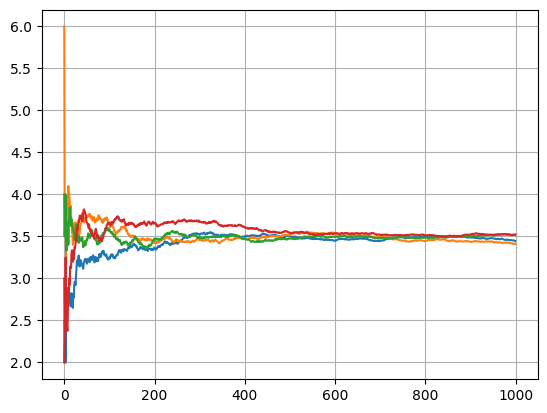

In [40]:
#大数の法則 // P112

calc_times = 1000
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
  p = np.random.choice(sample_array, calc_times).cumsum()
  plt.plot(p / number_cnt)
  plt.grid(True)

  # ↓Nが大きくなるほど3.5に近づいている

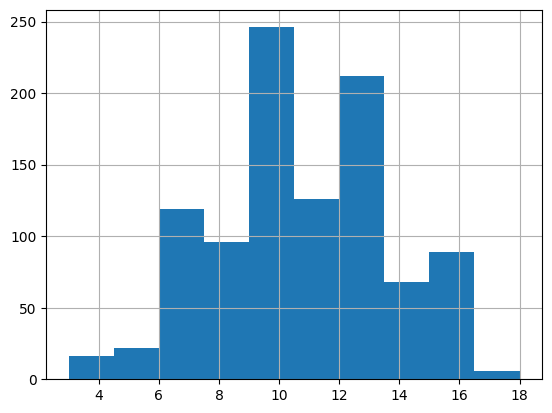

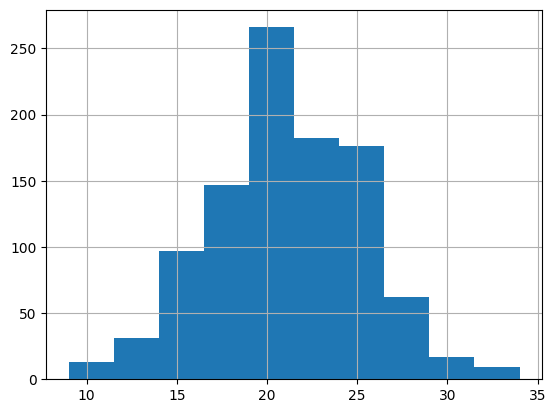

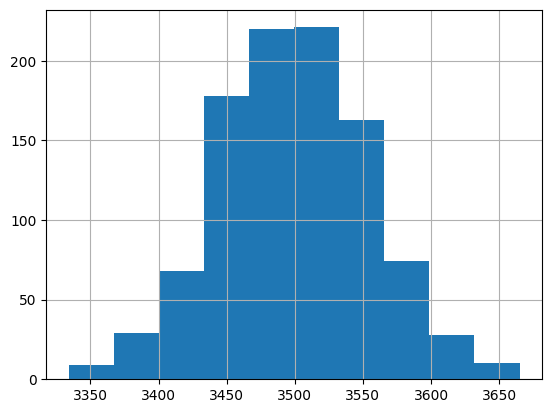

In [41]:
# 中心極限定理 // P113
# 互いに独立な確率変数の和$X_1+X_2+\cdots +X_n$は、各々の確率変数の分布に関わらず一定の分布に従うことがある
#その中でも「一定の分布」が正規分布であるものをさす

def function_central_theory(N):
  sample_array = np.array([1,2,3,4,5,6])
  number_cnt = np.arange(1, N + 1) * 1.0

  mean_array = np.array([])

  for i in range(1000):
    cum_variables = np.random.choice(sample_array, N).cumsum() * 1.0
    mean_array = np.append(mean_array, cum_variables[N - 1])

  fig, ax = plt.subplots()
  ax.hist(mean_array)
  ax.grid(True)
  fig.show()

function_central_theory(3)
function_central_theory(6)
function_central_theory(1000)

# ↓Nが 3,6,1000と大きくなるにつれ、正規分布の形に近づいている

**カイ二乗分布 // P114**
> 確率変数$Z_1,Z_2,\cdots ,Z_m$が互いに独立に分布し、各$Z_i$が標準正規分布に従うとき、
$$W=\sum_{i=1}^mZ_i^2$$
> は自由度$m$のカイ二乗分布に従う

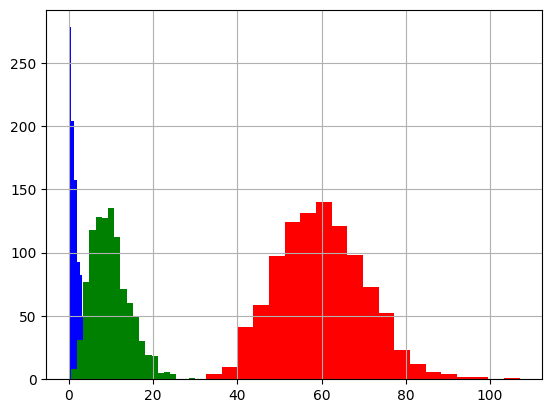

In [42]:
# 自由度 2,10,60 に従うカイ二乗分布が生成する乱数のヒストグラムを描く
for df, c in zip([2,10,60], "bgr"):
  x = np.random.chisquare(df, 1000)
  plt.hist(x, 20, color=c)
  plt.grid(True)

**ステューデントｔ分布 // P115**
> 互いに独立で、標準正規分布に従う$Z$と自由度$m$のカイ二乗分布に従う$W$があるとき、
$$T=\frac{Z}{\sqrt{\frac{W}{m}}}$$
> は自由度$m$のステューデントｔ分布に従う

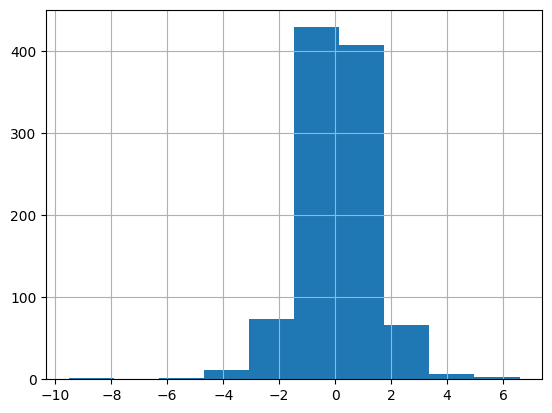

In [43]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

**F分布**
> 互いに独立で、自由度$m_1$のカイ二乗分布に従う$W_1$と自由度$m_2$のカイ二乗分布に従う$W_2$があるとき、
$$F=\frac{\frac{W_1}{m_1}}{\frac{W_2}{m_2}}$$
> は自由度$(m_1,m_2)$のF分布に従う

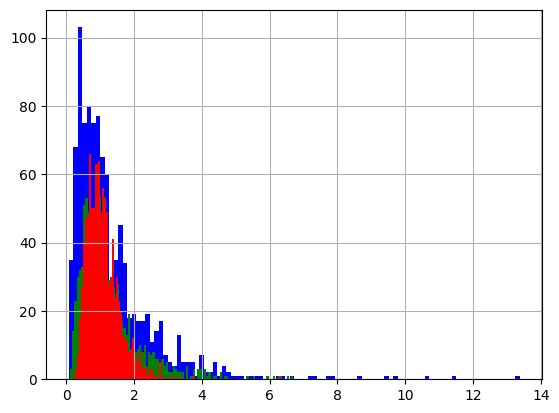

In [44]:
# F分布
for df, c in zip([(6,7),(10,10),(20,25)], "bgr"):
  x = np.random.f(df[0], df[1], 1000)
  plt.hist(x, 100, color=c)
  plt.grid(True)

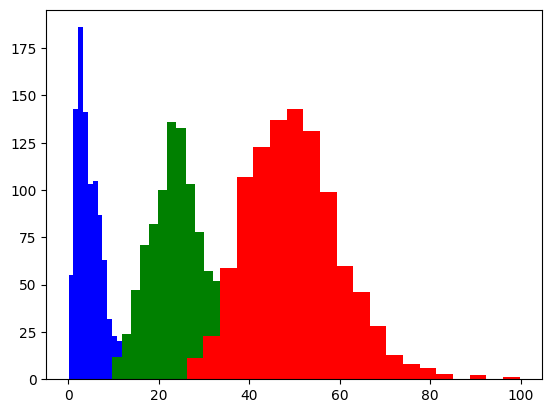

In [45]:
# 練習問題 4-7
# 自由度 5, 25, 50のカイ二乗分布の乱数からそれぞれ1000個発生させて、ヒストグラムを描きなさい

for df, c in zip([5,25,50],"bgr"):
  x = np.random.chisquare(df, 1000)
  plt.hist(x, 20, color=c)

plt.show()

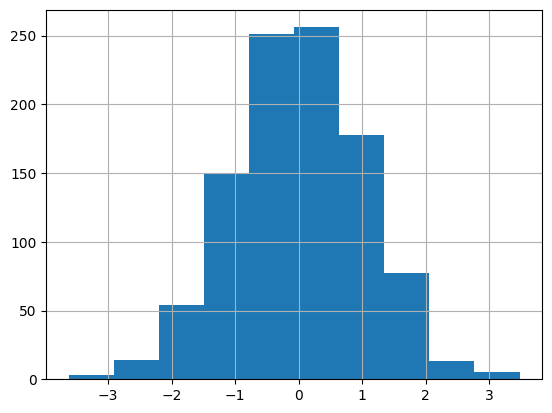

In [46]:
# 練習問題 4-8
#自由度100のｔ分布からの乱数を1000\個生成してヒストグラムを描く

x = np.random.standard_t(100, 1000)

plt.hist(x)
plt.grid(True)
plt.show()

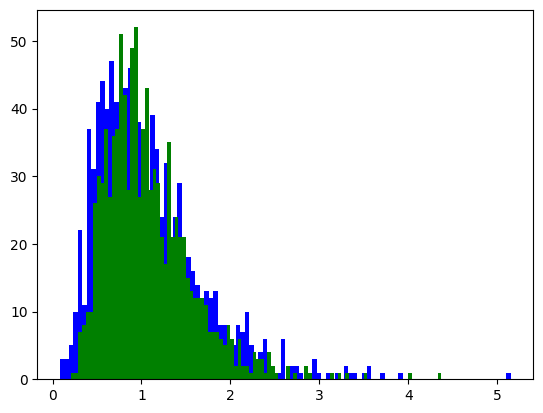

In [47]:
# 練習問題 4-9
# 自由度(10,30),(20,25)のＦ分布からの乱数を1000個生成してヒストグラムを描く

for df, c in zip([(10,30),(20,25)],"bg"):
  x = np.random.f(df[0], df[1], 1000)
  plt.hist(x, 100, color=c)

plt.show()

**推定量と点推定 // P117**
> 母集団の確率分布，平均，分散の推測をしたいときは、母集団から標本を抽出し、標本の平均や分散から推測する
>
> ここで、大きさ$n$の無作為標本$\left\{X_1,X_2,\cdots ,X_n\right\}$をもとに、母平均$\mu$を求める方法を考える
>
> 標本の平均$\bar{X}$は、
$$\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$$
> である
>
> これを一般化すると、以下のように確率変数の関数として記述できる
$$\bar{X}=T(X_1,X_2,\cdots ,X_n)$$
> この式を推定量という
>
> ---
>
> 推定量：母平均や母分散など母数を推定するための式
>
> 点推定：標本に基づいて、母数を１点のパラメータ値（$\theta$）として言い当てること

**不偏性と一致性 // P117**
> 推定量の期待値が母数と一致する（$\:E[T(X_1,X_2,\cdots ,X_n)]=\theta\:$）
>
> $\rightarrow\:$推定量に不偏性がある（この推定量は不偏推定量）
>
> $n$が大きくなるにつれて推定量が母数に近づく（$\:\displaystyle\lim_{n\rightarrow\infty}P[|T(X_1,X_2,\cdots ,X_n)-\theta|\geq\epsilon]=0\:$）
>
> $\rightarrow\:$推定量に一致性がある（この推定量は一致推定量）

**区間推定 // P118**
> 点推定では母数を１点で求めたが、区間推定ではある程度の区間を持たせて、そこに母数が入っている確率を計算する
>
> 標本$X_1,X_2,\cdots ,X_n$があり、これが平均$\mu$，分散$\:1\:$の正規分布から無作為抽出されているとするとき、標本平均$\bar{X}$は平均$\mu$，分散$\frac{1}{n}$の正規分布に従うので、標準正規分布の両端$\alpha$点を$z_{\alpha/2}$として、
$$P\left(-z_{\alpha/2}\leq\sqrt{n}\left(\bar{X}-\mu\right)\leq z_{\alpha/2}\right)=1-\alpha$$
> が成り立つ
>
> これを変形すると
$$P\left(\bar{X}-\frac{z_{\alpha/2}}{\sqrt{n}}\leq\mu\leq\bar{X}+\frac{z_{\alpha/2}}{\sqrt{n}}\right)=1-\alpha$$
> となる
>
> そのため、区間$\left[\bar{X}-\frac{z_{\alpha/2}}{\sqrt{n}},\bar{X}+\frac{z_{\alpha/2}}{\sqrt{n}}\right]$を推定の区間として用いることができる
>
> この区間を信頼区間という
>
> ---
>
> 信頼区間：区間$\left[\bar{X}-\frac{z_{\alpha/2}}{\sqrt{n}},\bar{X}+\frac{z_{\alpha/2}}{\sqrt{n}}\right]$
>
> 信頼係数：$1-\alpha$　信頼区間に母数（ここでは母平均）が入っている確率

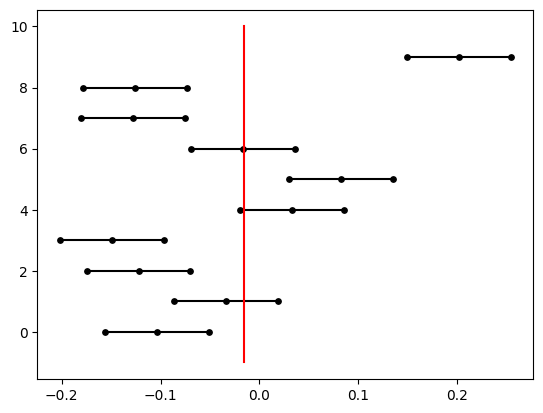

In [48]:
# サンプルプログラム

from matplotlib.colors import scale

def N (x, m, s):
  return 1 / np.sqrt(2 * np.pi * s) * np.exp(-(x - m)**2 / (2 * s**2))

n = 100.0
P = np.random.normal(0, 1, 1000)
conf = 0.4

for i in range(10):
  mean = np.mean(np.random.choice(P, int(n), replace=False))

  a_2 = (1.0 - conf) / 2.0
  za_2 =  sp.stats.norm.ppf(q=1.0 - a_2, loc=0.0, scale=1.0)

  x = [mean - za_2 / np.sqrt(n), mean, mean + za_2 / np.sqrt(n)]
  y = [i, i, i]
  plt.scatter(x, y, c="black", s=15)
  plt.plot(x,y, c="black")
plt.plot([np.mean(P), np.mean(P)], [-1, 10], c="red")
plt.show()

**推定量を求める // P118**

**最尤法**
> 観測値が与えられたときに、確率関数を母数の関数とみなしたものを尤度関数という
>
> 最尤法では、尤度関数が返す値が最大になるときの母数を母数の推定値とする
>
> 確率関数$f(x;\theta)$が与えられているとするとき、母集団から無作為標本$X_1,X_2,\cdots ,X_n$をとり、$X=(X_1,X_2,\cdots ,X_n)$とする
>
> この$X$の実現値$x=(x_1,x_2,\cdots ,x_n)$における同時確率関数を$\theta$の関数とみなして、以下のように尤度関数を定義する
$$L(\theta;x)=\prod_{i=1}^nf(x_i;\theta)$$
> この式を微分しやすいように変形すると
$$\log L(\theta;x)=\sum_{i=1}^n\log f(x_i;\theta)$$
> この関数（対数尤度関数）が最大になるときの$\:\theta\:$は
$$\frac{d}{d\theta}\log L(\theta;x)=0$$
> を解けば求まる


**ベイズ法 // P119**
> 母数$\theta$に対して事前分布を仮定して、ベイズの定理を使い事後分布に更新していく方法をベイズ法という。
> 標本から得られる尤度関数を$p(x|\theta)$として、母数が事前分布$\pi(x|\theta)$に従うと仮定すると、事後分布はベイズの定理より
$$\pi(x|\theta)=\frac{p(x|\theta)\pi(\theta)}{\int p(x|\theta)\pi(\theta)d\theta}$$

In [49]:
# 練習問題 4-10 (計算問題)
# 平均μで分散σ^2の正規母集団から抽出した大きさnの標本の標本平均は、 母平均であることが望ましく、この不偏性を示せ

> 標本平均
>
> $$\displaystyle\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i$$
>
> について、
>
> $$E[\bar{X}]=\mu$$
>
> を示すことができればよい
>
> ここで、
>
> $$\displaystyle E[\bar{X}]=E\left[\frac{1}{n}\sum_{i=1}^nX_i\right]=\frac{1}{n}\sum_{i=1}^nE[X_i]$$
>
> 問題文より母集団の平均が$\:\mu\:$なので、$E[X_i]=\mu$
>
> したがって、$\displaystyle E[\bar{X}]=\frac{1}{n}n\mu=\mu\:$となり、不偏性があるといえた


In [ ]:
# 練習問題 4-11 (計算問題)
# あるコインを5回投げて、裏，表，裏，表，表と出た。このコインの表が出る確率をθとして、θを推定する

> 表が出る確率を$\:\theta\:$とすると、裏が出る確率は$\:1-\theta\:$なので、
>
> 尤度関数は、$L(\theta)=\theta^3(1-\theta)^2$
>
> $\displaystyle\frac{d}{d\theta}\theta^3(1-\theta)^2=0\rightarrow\theta^2(\theta-1)(5\theta-3)\rightarrow\theta=0,1,\frac{3}{5}$
>
> $\displaystyle L(0)=0,\:L(1)=0,\:L\left(\frac{3}{5}\right)=\frac{108}{3125}$
>
> なので、最尤推定値は$\displaystyle\:\theta=\frac{3}{5}=0.6$

In [ ]:
# 練習問題 4-12 (計算問題)

> #　母集団が$f(x|\lambda)=\lambda e^{-\lambda x}$に従っているとき、そこから抽出した大きさ$\:n\:$の標本の> 母数$\:\lambda\:$最尤推定する

> $\displaystyle L(x|\lambda)=\prod_{i=1}^nf(x_i|\lambda)$
>
> $\displaystyle \log L(x|\lambda)=\sum_{i=1}^n\log f(x_i|\lambda)$
>
> $\displaystyle \log L(x|\lambda)=\sum_{i=1}^n\log \lambda e^{-\lambda x_i}$
>
> $\displaystyle \log L(x|\lambda)=\sum_{i=1}^n\left(\log \lambda + \log e^{-\lambda x_i}\right)$
>
> $\displaystyle \log L(x|\lambda)=\sum_{i=1}^n\left(\log \lambda - \lambda x_i\right)$
>
> $\displaystyle \log L(x|\lambda)=n\log \lambda - \lambda\sum_{i=1}^nx_i$
>
> $\log L(x|\lambda)\:$を最大にする$\:\lambda\:$を求めたいので
>
> $\displaystyle \frac{d}{d\lambda}\left(nlog \lambda - \lambda\sum_{i=1}^nx_i\right)=0$
>
> $\displaystyle \frac{n}{\lambda} - \sum_{i=1}^nx_i=0$
>
> $\displaystyle \lambda=\frac{n}{\sum_{i=1}^nx_i}$
>


In [50]:
# 統計的検定 // P120

student_data_math = pd.read_csv("student-mat.csv", sep=";")
student_data_por  = pd.read_csv("student-por.csv", sep=";")

student_data_marge = pd.merge(
  student_data_math, student_data_por,
  on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","reason","nursery","internet"],
  suffixes=("_math", "_por")
)

print("G1数学の平均成績 ：", student_data_marge.G1_math.mean())
print("G1ポルトガル語の平均成績 ：", student_data_marge.G1_por.mean())

G1数学の平均成績 ： 10.85925925925926
G1ポルトガル語の平均成績 ： 12.098765432098766


**検定 // P120**
> 上のプログラムの実行結果を見ると、数学よりポルトガル語の成績のほうが僅かに良い
>
> しかし、これが今回だけの誤差なのか、そうでないのかは分からない
>
> これがどちらなのかを検定を使って確かめることができる
>
> ---
>
> 帰無仮説（$H_0$）：これから正しいかどうか検証する仮説
>
> 対立仮説（$H_1$）：帰無仮説を否定する仮説
>
> $H_0$が正しいなら「帰無仮説が採択される」といい、$H_0$が正しくないなら「帰無仮説が棄却される」という
>
> 有意水準（$\alpha$）：帰無仮説が棄却されるかどうかの水準
>
> ---
> 今、「数学とポルトガル語の平均成績の差が有意でない」という帰無仮説を立てる
>
> $\alpha=1\%$としてp値（実際に反した統計量が計算される確率）を計算すると


In [51]:
from scipy import stats
t, p = sp.stats.ttest_rel(student_data_marge.G1_math, student_data_marge.G1_por)
print("p値 =", p)

p値 = 3.3388106906287995e-16


**第１種の過誤と第２種の過誤 // P121**
> 第１種の過誤：正しい帰無仮説を棄却してしまうこと
>
> 第２種の過誤：誤っている帰無仮説を採択してしまうこと
>
> 第１種の過誤が起きる確率を$\alpha$，第２種の過誤が起きる確率を$\beta$で表す
>
> また、$1-\beta\:$を検出力という

**ビッグデータに対する検定の注意 // P122**
> 検定はサンプルサイズを大きくすると、それに伴って検出力が大きくなり、実務的には等しいと考えていいような差でもp値が小さくなって、差があるということになってしまう
>
> また、検定で差があるという結果が出ても、その差が大きいのか小さいのかは分からない

In [52]:
# 練習問題 4-13
# 3章で用いたデータ(student-mat.csv及びstudent-por.csv)で数学とポルトガル語の成績G2のそれぞれの平均について、差があるといえるか。また、G3はどうか。


student_data_math = pd.read_csv("student-mat.csv", sep=";")
student_data_por = pd.read_csv("student-por.csv", sep=";")
student_data_merge = pd.merge(
  student_data_math,
  student_data_por,
  on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"],
  how="inner",
  suffixes=("_math", "_por")
)

print("G2数学の平均成績 :", student_data_merge.G2_math.mean())
print("G2ポルトガル語の平均成績 :", student_data_merge.G2_por.mean())

t, p = sp.stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print("p値 =", p)

if p < 0.01:
  print("差があるといえる")
else:
  print("差があるといえない")
print()

print("G3数学の平均成績 :", student_data_merge.G3_math.mean())
print("G3ポルトガル語の平均成績 :", student_data_merge.G3_por.mean())

t, p = sp.stats.ttest_rel(student_data_merge.G3_math, student_data_merge.G3_por)
print("p値 =", p)

if p < 0.01:
  print("差があるといえる")
else:
  print("差があるといえない")
print()

G2数学の平均成績 : 10.712041884816754
G2ポルトガル語の平均成績 : 12.238219895287958
p値 = 4.0622824801348625e-19
差があるといえる

G3数学の平均成績 : 10.387434554973822
G3ポルトガル語の平均成績 : 12.515706806282722
p値 = 5.561492113688385e-21
差があるといえる



## 総合問題


In [53]:
# 総合問題 4-1
# 4-7(統計的検定)で使用したデータ(student_data_merge)について以下の問いに答えなさい

# それぞれの欠席数(absences)について差があるかどうか。
# それぞれの勉強時間(studytime)について差があるかどうか。


print("1.")
print("数学の平均欠席数 :", student_data_merge.absences_math.mean())
print("ポルトガル語の平均欠席数 :", student_data_merge.absences_por.mean())

t, p = sp.stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print("p値 =", p)

if p < 0.01:
  print("差があるといえる")
else:
  print("差があるといえない")
print()

print("2.")
print("数学の平均勉強時間 :", student_data_merge.studytime_math.mean())
print("ポルトガル語の平均勉強時間 :", student_data_merge.studytime_por.mean())

t, p = sp.stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print("p値 =", p)

if p < 0.01:
  print("差があるといえる")
else:
  print("差があるといえない")
print()

1.
数学の平均欠席数 : 5.319371727748691
ポルトガル語の平均欠席数 : 3.6727748691099475
p値 = 2.3441656888384195e-06
差があるといえる

2.
数学の平均勉強時間 : 2.0340314136125652
ポルトガル語の平均勉強時間 : 2.0392670157068062
p値 = 0.5643842756976525
差があるといえない



**参考文献**
1.   11-4. 確率密度と確率密度関数 | 統計学の時間 | 統計WEB
＜ https://bellcurve.jp/statistics/course/6602.html ＞（2023/10/06参照）
2.   12-1. 累積分布関数とは | 統計学の時間 | 統計WEB
＜ https://bellcurve.jp/statistics/course/6708.html ＞（2023/10/06参照）
3.   ポアソン分布を理解する | 津山工業高等専門学校
＜ https://www.tsuyama-ct.ac.jp/matsuda/MDataScienceTM2/pdf/poisson.pdf ＞（2023/10/07参照）
4.   15-5. 2変数の確率分布 | 統計学の時間 | 統計WEB
＜ https://bellcurve.jp/statistics/course/18401.html ＞（2023/10/09参照）
5.   Chapter 5 大数の法則と中心極限定理 | 筑波大学
＜ https://bellcurve.jp/statistics/course/18401.html ＞（2023/10/09参照）

